In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [2]:
def create_synthetic_data(start_time, end_time, step = 0.01):
    t = np.arange(start_time, end_time, step)
    x1 = np.sin(t)
    x2 = np.sin(2 * t)
    x3 = 0.2 * (10 - (t - 6)**2)
    y = 10 + 1*x1 + 1*x2 + 1*x3 + np.random.normal(0, 0.5, len(t))
    return (np.column_stack([x1, x2, x3]), y, t)

X_train, y_train, t_train = create_synthetic_data(0, 6)
print(X_train.shape, y_train.shape, t_train.shape)

(600, 3) (600,) (600,)


In [4]:
X_test, y_test, t_test = create_synthetic_data(6, 8)
print(X_test.shape, y_test.shape, t_test.shape)

(200, 3) (200,) (200,)


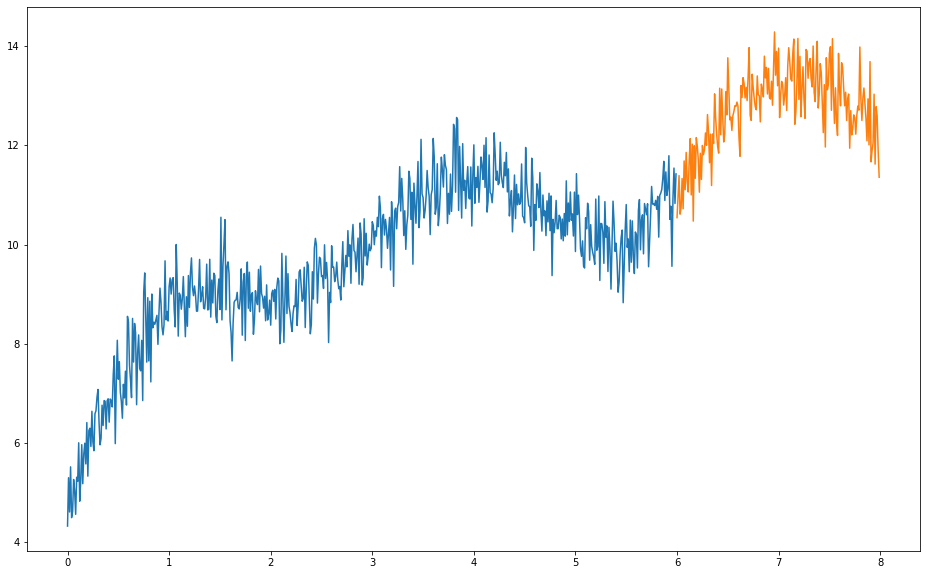

In [4]:
plt.figure(figsize = (16, 10))
plt.plot(t_train, y_train)
plt.plot(t_test, y_test)
plt.show()

In [5]:
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test[:,None]

print(y_train.shape)
print(y_test.shape)

(600, 1)
(200, 1)


In [6]:
from keras.preprocessing.sequence import TimeseriesGenerator
generator_train = TimeseriesGenerator(data = y_train,
                                      targets = y_train,
                                      length = 5,
                                      batch_size = 1)
generator_test = TimeseriesGenerator(data = y_test,
                                     targets = y_test,
                                     length = 5,
                                     batch_size = 1)

print(np.column_stack([generator_train.data, generator_train.targets, y_train]))
print(np.column_stack([generator_test.data, generator_test.targets, y_test]))

[[ 4.32882354  4.32882354  4.32882354]
 [ 5.30345919  5.30345919  5.30345919]
 [ 4.61315133  4.61315133  4.61315133]
 ...
 [11.54379052 11.54379052 11.54379052]
 [10.83071141 10.83071141 10.83071141]
 [11.42657362 11.42657362 11.42657362]]
[[10.5448578  10.5448578  10.5448578 ]
 [10.97428579 10.97428579 10.97428579]
 [11.39352407 11.39352407 11.39352407]
 [10.61538007 10.61538007 10.61538007]
 [10.74884015 10.74884015 10.74884015]
 [11.33385164 11.33385164 11.33385164]
 [10.72358261 10.72358261 10.72358261]
 [11.68773113 11.68773113 11.68773113]
 [11.10693635 11.10693635 11.10693635]
 [11.86005751 11.86005751 11.86005751]
 [11.27806896 11.27806896 11.27806896]
 [11.06151941 11.06151941 11.06151941]
 [11.69554333 11.69554333 11.69554333]
 [12.13724093 12.13724093 12.13724093]
 [11.00309308 11.00309308 11.00309308]
 [12.02551398 12.02551398 12.02551398]
 [10.47509574 10.47509574 10.47509574]
 [11.9931654  11.9931654  11.9931654 ]
 [11.3374283  11.3374283  11.3374283 ]
 [12.15854844 12.15

In [7]:
rnn_model = keras.models.Sequential([
    keras.layers.LSTM(units = 50, return_sequences = False, 
                      input_shape = (generator_train.length, 1)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 10, activation = "relu"),
    keras.layers.Dense(units = 1)
])

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 10,921
Trainable params: 10,921
Non-trainable params: 0
_________________________________________________________________


2022-08-13 12:52:47.225577: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
rnn_model.compile(loss = "mean_squared_error",
                  optimizer = "adam")

In [9]:
print(generator_train.length)
print(len(generator_train))


# 8 10 12 10 8 12 10 12 ...
# x1 = [8 10 12 10] y1 = 8
# x2 = [10 12 10 8] y2 = 12
# x3 = [12 10 8 12] y3 = 10
# x4 = [10 8 12 10] y4 = 12
# x5 = [8 12 10 12] y5 = ?

5
595


In [10]:
rnn_history = rnn_model.fit(generator_train,
                            steps_per_epoch = len(generator_train),
                            epochs = 25,
                            verbose = 1)

Epoch 1/25
595/595 [==============================] - 2s 2ms/step - loss: 5.6391
Epoch 2/25
595/595 [==============================] - 1s 2ms/step - loss: 1.0888
Epoch 3/25
595/595 [==============================] - 1s 2ms/step - loss: 0.9765
Epoch 4/25
595/595 [==============================] - 1s 2ms/step - loss: 0.9141
Epoch 5/25
595/595 [==============================] - 1s 2ms/step - loss: 0.9828
Epoch 6/25
595/595 [==============================] - 1s 2ms/step - loss: 0.7832
Epoch 7/25
595/595 [==============================] - 1s 2ms/step - loss: 0.9155
Epoch 8/25
595/595 [==============================] - 1s 2ms/step - loss: 0.9858
Epoch 9/25
595/595 [==============================] - 1s 2ms/step - loss: 0.8266
Epoch 10/25
595/595 [==============================] - 1s 2ms/step - loss: 0.9554
Epoch 11/25
595/595 [==============================] - 1s 2ms/step - loss: 0.8057
Epoch 12/25
595/595 [==============================] - 1s 2ms/step - loss: 0.7811
Epoch 13/25
595/595 [====

In [11]:
rnn_model.evaluate(generator_train)
rnn_model.evaluate(generator_test)

195/195 [==============================] - 0s 699us/step - loss: 0.7690


0.7689719796180725

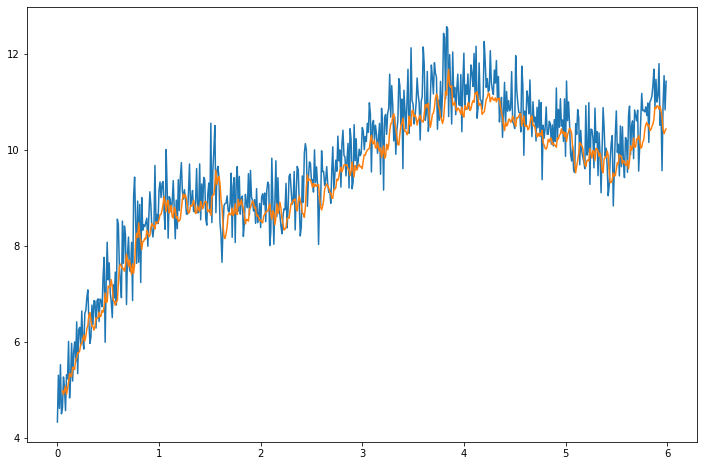

In [12]:
y_train_hat = rnn_model.predict(generator_train)
plt.figure(figsize = (12, 8))
plt.plot(t_train, y_train)
plt.plot(t_train[5:600], y_train_hat)
plt.show()

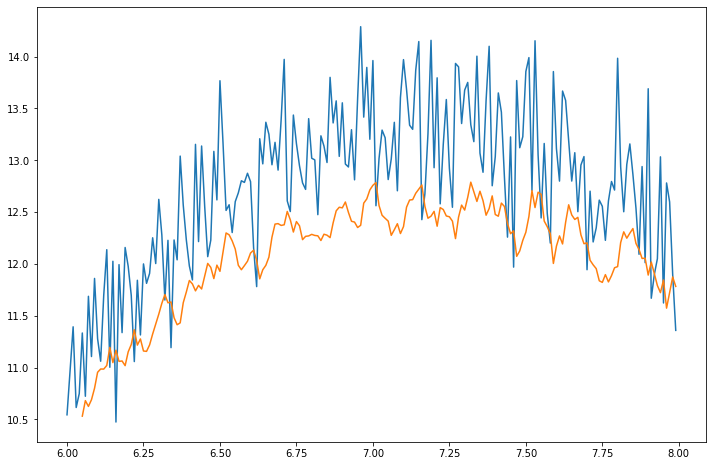

In [13]:
y_test_hat = rnn_model.predict(generator_test)
plt.figure(figsize = (12, 8))
plt.plot(t_test, y_test)
plt.plot(t_test[5:200], y_test_hat)
plt.show()

In [14]:
raw_data = pd.read_csv("http://home.ku.edu.tr/~mehmetgonen/germany.csv",
                       parse_dates = [0], index_col = 0)
display(raw_data.head())

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [15]:
data = raw_data.loc["2012-01-01":]
display(data.head())
display(data.tail())

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-01-01,948.128,227.465,6.587,234.052
2012-01-02,1269.581,207.327,6.574,213.901
2012-01-03,1334.745,473.468,24.679,498.147
2012-01-04,1347.136,499.804,14.681,514.485
2012-01-05,1376.658,523.851,5.071,528.922


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [16]:
y_train = data["Consumption"].loc[:"2016-12-31"].to_numpy()
y_test = data["Consumption"].loc["2017-01-01":].to_numpy()
y_train = y_train[:,None]
y_test = y_test[:,None]
print(y_train.shape)
print(y_test.shape)

(1827, 1)
(365, 1)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0.05, 0.95))
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
print(np.min(y_train), np.max(y_train))
print(np.min(y_test), np.max(y_test))

0.050000000000000044 0.95
0.18537637234253257 0.9612801022145185


In [18]:
window_size = 30
generator_train = TimeseriesGenerator(y_train,
                                      y_train,
                                      length = window_size,
                                      batch_size = 8)
generator_test = TimeseriesGenerator(y_test,
                                     y_test,
                                     length = window_size,
                                     batch_size = 1) 

In [19]:
rnn_model = keras.models.Sequential([
    keras.layers.LSTM(units = 128,
                      input_shape = (window_size, 1)),
    keras.layers.Dense(units = 64, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 16, activation = "relu"),
    keras.layers.Dense(units = 1)
])

rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 75,873
Trainable params: 75,873
Non-trainable params: 0
_________________________________________________________________


In [20]:
rnn_model.compile(optimizer = "adam",
                  loss = "mean_squared_error")

In [21]:
rnn_history = rnn_model.fit(generator_train,
                            steps_per_epoch = len(generator_train),
                            epochs = 10)

Epoch 1/10
225/225 [==============================] - 3s 8ms/step - loss: 0.0466
Epoch 2/10
225/225 [==============================] - 2s 8ms/step - loss: 0.0328
Epoch 3/10
225/225 [==============================] - 2s 8ms/step - loss: 0.0303
Epoch 4/10
225/225 [==============================] - 2s 8ms/step - loss: 0.0194
Epoch 5/10
225/225 [==============================] - 2s 8ms/step - loss: 0.0126
Epoch 6/10
225/225 [==============================] - 2s 8ms/step - loss: 0.0098
Epoch 7/10
225/225 [==============================] - 2s 8ms/step - loss: 0.0090
Epoch 8/10
225/225 [==============================] - 2s 8ms/step - loss: 0.0083
Epoch 9/10
225/225 [==============================] - 2s 8ms/step - loss: 0.0079
Epoch 10/10
225/225 [==============================] - 2s 8ms/step - loss: 0.0074


In [22]:
y_train_hat = rnn_model.predict(generator_train)
y_test_hat = rnn_model.predict(generator_test)

In [23]:
y_train_original = scaler.inverse_transform(y_train)[:,0]
y_test_original = scaler.inverse_transform(y_test)[:,0]
print(y_train_original)

[ 948.128 1269.581 1334.745 ... 1295.897 1291.044 1212.568]


In [24]:
y_train_hat_scaled = scaler.inverse_transform(y_train_hat)[:,0]
y_test_hat_scaled = scaler.inverse_transform(y_test_hat)[:,0]
print(y_train_hat_scaled)

[1449.6632 1460.0043 1477.9253 ... 1318.7948 1298.7272 1184.5457]


In [25]:
print(y_test_original.shape)
print(y_test_hat_scaled.shape)

(365,)
(335,)


In [26]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_train_original[window_size:], y_train_hat_scaled)))
print(np.sqrt(mean_squared_error(y_test_original[window_size:], y_test_hat_scaled)))

66.6305858796371
65.46403128513384


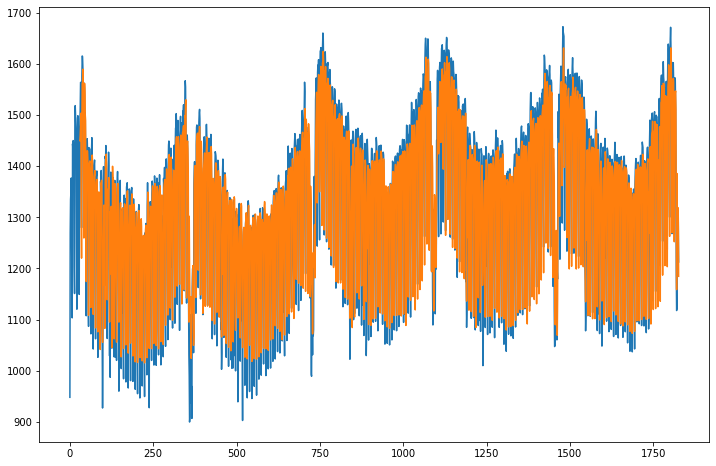

In [27]:
plt.figure(figsize = (12, 8))
plt.plot(range(len(y_train_original)), y_train_original)
plt.plot(np.arange(window_size, len(y_train_original)), y_train_hat_scaled)
plt.show()

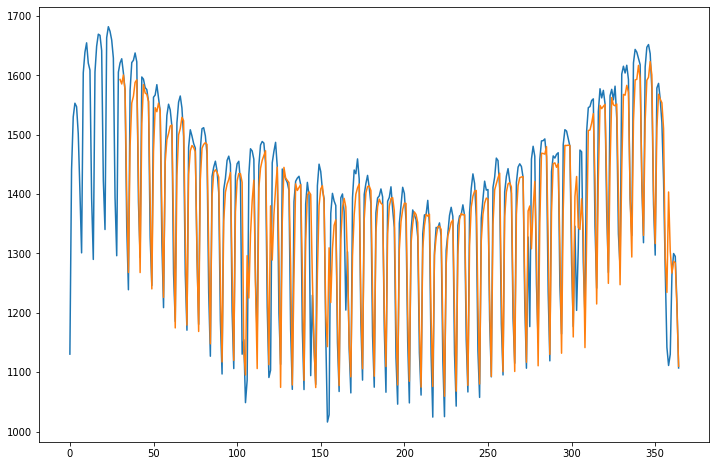

In [28]:
plt.figure(figsize = (12, 8))
plt.plot(range(len(y_test_original)), y_test_original)
plt.plot(np.arange(window_size, len(y_test_original)), y_test_hat_scaled)
plt.show()

In [29]:
print(np.corrcoef(y_train_hat.T, y_train[window_size:].T))
print(np.corrcoef(y_train_hat_scaled.T, y_train_original[window_size:].T))

[[1.         0.92170331]
 [0.92170331 1.        ]]
[[1.         0.92170331]
 [0.92170331 1.        ]]


In [30]:
print(np.sqrt(mean_squared_error(y_train_original[window_size:], y_train_hat_scaled)))
print(np.sqrt(mean_squared_error(y_test_original[window_size:], y_test_hat_scaled)))

print(np.sqrt(mean_squared_error(y_train[window_size:], y_train_hat)))
print(np.sqrt(mean_squared_error(y_test[window_size:], y_test_hat)))

66.6305858796371
65.46403128513384
0.07762857223566462
0.07626947228578905


In [31]:
X_train = data[["Consumption", "Wind", "Solar"]].loc[:"2016-12-31"].fillna(method = "ffill").to_numpy()
X_test = data[["Consumption", "Wind", "Solar"]].loc["2017-01-01":].fillna(method = "ffill").to_numpy()

y_train = data["Consumption"].loc[:"2016-12-31"].to_numpy()
y_test = data["Consumption"].loc["2017-01-01":].to_numpy()

y_train = y_train[:, None]
y_test = y_test[:, None]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1827, 3) (365, 3)
(1827, 1) (365, 1)


In [32]:
scaler_y = MinMaxScaler(feature_range = (0.05, 0.95))
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

scaler_X = MinMaxScaler(feature_range = (0.05, 0.95))
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [33]:
window_size = 30
generator_train = TimeseriesGenerator(X_train,
                                      y_train,
                                      length = window_size,
                                      batch_size = 8)
generator_test = TimeseriesGenerator(X_test,
                                     y_test,
                                     length = window_size,
                                     batch_size = 1)

In [34]:
rnn_model = keras.models.Sequential([
    keras.layers.LSTM(units = 256, input_shape = (window_size, X_train.shape[1])),
    keras.layers.Dense(units = 128, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 16, activation = "relu"),
    keras.layers.Dense(units = 1)
])

rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               266240    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 301,217
Trainable params: 301,217
Non-trainable params: 0
_________________________________________________________________


In [35]:
rnn_model.compile(optimizer = "adam",
                  loss = "mean_squared_error")

In [36]:
rnn_history = rnn_model.fit(generator_train,
                            steps_per_epoch = len(generator_train),
                            epochs = 10)

Epoch 1/10
225/225 [==============================] - 5s 15ms/step - loss: 0.0395
Epoch 2/10
225/225 [==============================] - 3s 14ms/step - loss: 0.0311
Epoch 3/10
225/225 [==============================] - 3s 15ms/step - loss: 0.0209
Epoch 4/10
225/225 [==============================] - 3s 14ms/step - loss: 0.0113
Epoch 5/10
225/225 [==============================] - 3s 15ms/step - loss: 0.0103
Epoch 6/10
225/225 [==============================] - 3s 14ms/step - loss: 0.0083
Epoch 7/10
225/225 [==============================] - 3s 15ms/step - loss: 0.0076
Epoch 8/10
225/225 [==============================] - 3s 14ms/step - loss: 0.0085
Epoch 9/10
225/225 [==============================] - 3s 14ms/step - loss: 0.0075
Epoch 10/10
225/225 [==============================] - 3s 15ms/step - loss: 0.0073


In [37]:
y_train_hat = rnn_model.predict(generator_train)
y_test_hat = rnn_model.predict(generator_test)

y_train_original = scaler.inverse_transform(y_train)[:,0]
y_test_original = scaler.inverse_transform(y_test)[:,0]
print(y_train_original)

y_train_hat_scaled = scaler.inverse_transform(y_train_hat)[:,0]
y_test_hat_scaled = scaler.inverse_transform(y_test_hat)[:,0]
print(y_train_hat_scaled)

print(np.sqrt(mean_squared_error(y_train_original[window_size:], y_train_hat_scaled)))
print(np.sqrt(mean_squared_error(y_test_original[window_size:], y_test_hat_scaled)))

[ 948.128 1269.581 1334.745 ... 1295.897 1291.044 1212.568]
[1496.2948 1490.3821 1480.9646 ... 1305.4504 1281.0342 1148.755 ]
63.21503176476086
62.12345475374131


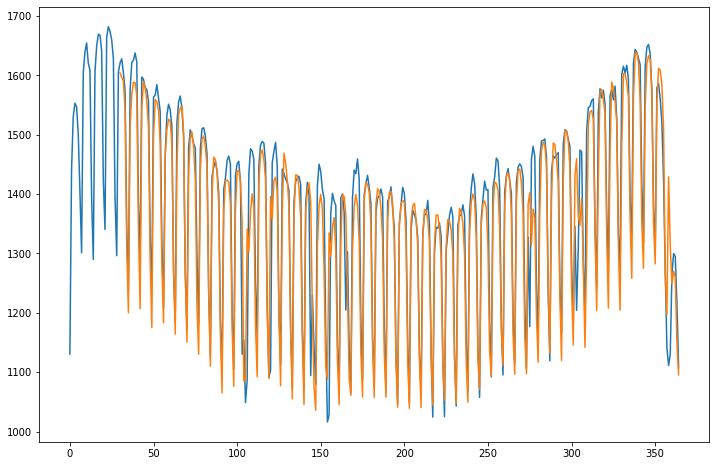

In [38]:
plt.figure(figsize = (12, 8))
plt.plot(range(len(y_test_original)), y_test_original)
plt.plot(np.arange(window_size, len(y_test_original)), y_test_hat_scaled)
plt.show()

In [39]:
X_train = data[["Consumption", "Wind", "Solar"]].loc[:"2016-12-31"].fillna(method = "ffill").to_numpy()
X_test = data[["Consumption", "Wind", "Solar"]].loc["2017-01-01":].fillna(method = "ffill").to_numpy()

y_train = data["Consumption"].loc[:"2016-12-31"].to_numpy()
y_test = data["Consumption"].loc["2017-01-01":].to_numpy()

y_train = y_train[:, None]
y_test = y_test[:, None]

scaler_y = MinMaxScaler(feature_range = (0.05, 0.95))
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

scaler_X = MinMaxScaler(feature_range = (0.05, 0.95))
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [40]:
days = data[:"2016-12-31"].index.day.to_numpy()
days = days[:,None] / 31
months = data[:"2016-12-31"].index.month.to_numpy()
months = months[:,None] / 12
X_train = np.hstack((X_train, days, months))

days = data["2017-01-01":].index.day.to_numpy()
days = days[:,None] / 31
months = data["2017-01-01":].index.month.to_numpy()
months = months[:,None] / 12
X_test = np.hstack((X_test, days, months))

print(X_train.shape)
print(X_test.shape)

(1827, 5)
(365, 5)


In [41]:
window_size = 30
generator_train = TimeseriesGenerator(X_train,
                                      y_train,
                                      length = window_size,
                                      batch_size = 8)
generator_test = TimeseriesGenerator(X_test,
                                     y_test,
                                     length = window_size,
                                     batch_size = 1)

In [42]:
rnn_model = keras.models.Sequential([
    keras.layers.LSTM(units = 256, input_shape = (window_size, X_train.shape[1])),
    keras.layers.Dense(units = 128, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units = 16, activation = "relu"),
    keras.layers.Dense(units = 1)
])

rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               268288    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 16)                2064      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 303,265
Trainable params: 303,265
Non-trainable params: 0
_________________________________________________________________


In [43]:
rnn_model.compile(optimizer = "adam",
                  loss = "mean_squared_error")

In [44]:
rnn_history = rnn_model.fit(generator_train,
                            steps_per_epoch = len(generator_train),
                            epochs = 10)

Epoch 1/10
225/225 [==============================] - 6s 20ms/step - loss: 0.0412
Epoch 2/10
225/225 [==============================] - 5s 20ms/step - loss: 0.0313
Epoch 3/10
225/225 [==============================] - 4s 18ms/step - loss: 0.0281
Epoch 4/10
225/225 [==============================] - 4s 16ms/step - loss: 0.0145
Epoch 5/10
225/225 [==============================] - 3s 15ms/step - loss: 0.0099
Epoch 6/10
225/225 [==============================] - 3s 15ms/step - loss: 0.0085
Epoch 7/10
225/225 [==============================] - 3s 15ms/step - loss: 0.0074
Epoch 8/10
225/225 [==============================] - 4s 16ms/step - loss: 0.0068
Epoch 9/10
225/225 [==============================] - 4s 16ms/step - loss: 0.0067
Epoch 10/10
225/225 [==============================] - 4s 16ms/step - loss: 0.0071


In [45]:
y_train_hat = rnn_model.predict(generator_train)
y_test_hat = rnn_model.predict(generator_test)

y_train_original = scaler.inverse_transform(y_train)[:,0]
y_test_original = scaler.inverse_transform(y_test)[:,0]
print(y_train_original)

y_train_hat_scaled = scaler.inverse_transform(y_train_hat)[:,0]
y_test_hat_scaled = scaler.inverse_transform(y_test_hat)[:,0]
print(y_train_hat_scaled)

print(np.sqrt(mean_squared_error(y_train_original[window_size:], y_train_hat_scaled)))
print(np.sqrt(mean_squared_error(y_test_original[window_size:], y_test_hat_scaled)))

[ 948.128 1269.581 1334.745 ... 1295.897 1291.044 1212.568]
[1491.1567 1488.6395 1523.1847 ... 1244.5311 1312.1572 1180.9928]
61.96435486387653
58.29757191620664


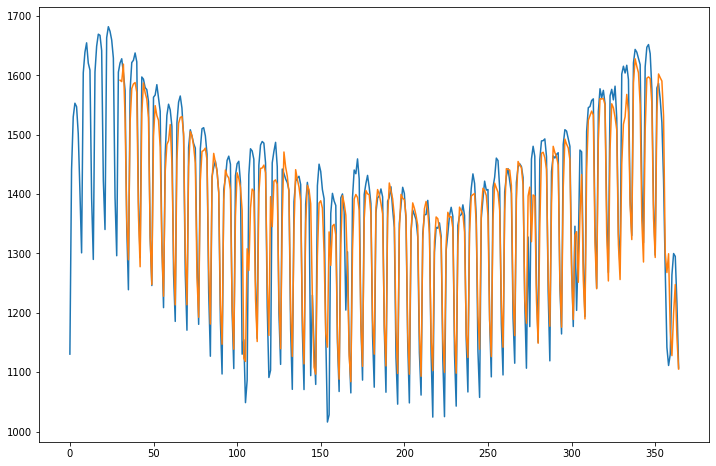

In [46]:
plt.figure(figsize = (12, 8))
plt.plot(range(len(y_test_original)), y_test_original)
plt.plot(np.arange(window_size, len(y_test_original)), y_test_hat_scaled)
plt.show()

In [47]:
docs = [
    "Well done!",
    "Good work",
    "Great effort",
    "nice work",
    "Excellent!",
    "Weak",
    "Poor effort!",
    "not good",
    "poor work",
    "Could have done better."
]

labels = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [48]:
vocabulary_size = 30
encoded_docs = [keras.preprocessing.text.one_hot(d, n = vocabulary_size) for d in docs]
print(encoded_docs)

[[25, 15], [12, 28], [13, 11], [15, 28], [25], [18], [25, 11], [13, 12], [25, 28], [1, 12, 15, 29]]


In [49]:
max_length = 4
padded_docs = keras.preprocessing.sequence.pad_sequences(encoded_docs,
                                                         maxlen = max_length,
                                                         padding = "post",
                                                         truncating = "pre")
print(padded_docs)

[[25 15  0  0]
 [12 28  0  0]
 [13 11  0  0]
 [15 28  0  0]
 [25  0  0  0]
 [18  0  0  0]
 [25 11  0  0]
 [13 12  0  0]
 [25 28  0  0]
 [ 1 12 15 29]]


In [50]:
test_docs = ["Nice effort",
             "Weak and poor work"]

encoded_test_docs = [[25, 29], [24, 20, 2]]
padded_test_docs = keras.preprocessing.sequence.pad_sequences(encoded_test_docs,
                                                              maxlen = max_length,
                                                              padding = "post",
                                                              truncating = "pre")
print(padded_test_docs)

[[25 29  0  0]
 [24 20  2  0]]


In [51]:
embedding_dim = 8

embedding_model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embedding_dim, input_length = max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation = "sigmoid")
])

embedding_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              240       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [52]:
embedding_model.compile(loss = "binary_crossentropy",
                        optimizer = "adam",
                        metrics = ["acc"])

In [53]:
embedding_history = embedding_model.fit(padded_docs, labels,
                                        epochs = 100,
                                        verbose = 1)

Epoch 1/100
1/1 [==============================] - 0s 318ms/step - loss: 0.6878 - acc: 0.7000
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6870 - acc: 0.7000
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6861 - acc: 0.7000
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6853 - acc: 0.7000
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6845 - acc: 0.7000
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6836 - acc: 0.7000
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6828 - acc: 0.7000
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6819 - acc: 0.7000
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6811 - acc: 0.7000
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6802 - acc: 0.7000
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 0.679

In [54]:
embedding_model.evaluate(padded_docs, labels)

1/1 [==============================] - 0s 79ms/step - loss: 0.5935 - acc: 0.7000


[0.593478262424469, 0.699999988079071]

In [55]:
E = embedding_model.layers[0].weights[0].numpy()
print(E[20,:]) # word 20 => poor
print(E[26,:]) # word 26 => good
print(E[22,:]) # word 22 => well
print(E[4,:]) # word 4 => great
print(E[24,:]) # word 24 => weak
print(E[2,:]) # word 2 => work
print(np.corrcoef(E[20,:], E[26,:]))
print(np.corrcoef(E[20,:], E[22,:]))
print(np.corrcoef(E[20,:], E[4,:]))
print(np.corrcoef(E[20,:], E[24,:]))
print(np.corrcoef(E[20,:], E[2,:]))

[-0.03819432 -0.0270591   0.0229623   0.00487707  0.02949703 -0.02704134
  0.00585045 -0.00130509]
[ 0.04978866  0.0373773  -0.03604884  0.00629035  0.03761437 -0.02062719
 -0.04424724  0.01028073]
[ 0.02694658  0.00908975 -0.02381235 -0.01222561  0.02485874 -0.02595998
 -0.00739113  0.03666211]
[ 0.04828299  0.0253934   0.00962385  0.01057132  0.00852977  0.01905285
  0.04526316 -0.01960908]
[-0.02425159 -0.0340569   0.02665776 -0.03968282 -0.01743849 -0.0030982
  0.03130516 -0.02976923]
[-0.02578486  0.04133704  0.0469105  -0.0474616  -0.00156174 -0.04032407
 -0.02001214 -0.00137255]
[[ 1.        -0.3505871]
 [-0.3505871  1.       ]]
[[ 1.         -0.10271576]
 [-0.10271576  1.        ]]
[[ 1.         -0.44295758]
 [-0.44295758  1.        ]]
[[1.         0.36433206]
 [0.36433206 1.        ]]
[[1.         0.24117504]
 [0.24117504 1.        ]]


In [56]:
embedding_model.predict(padded_docs)

array([[0.5181144 ],
       [0.69479585],
       [0.5281007 ],
       [0.59973377],
       [0.49405313],
       [0.50578845],
       [0.471908  ],
       [0.47191274],
       [0.55033815],
       [0.24210212]], dtype=float32)

In [57]:
embedding_model.predict(padded_test_docs)

array([[0.49178645],
       [0.5437053 ]], dtype=float32)